# NLP Summative
## Category and Journal Visualizations 

In [1]:
import json
cond_filtered9 = []

# Read the entire JSON file as a single string
with open('cond_filtered8.json', 'r') as f:
    json_data = f.read()
data = json.loads(json_data)
for entry in data.values():
    cond_filtered9.append(entry)

In [2]:
cond_filtered9

[{'id': '0704.0056',
  'submitter': 'Franz Saija',
  'authors': 'Santi Prestipino and Franz Saija',
  'title': 'Phase diagram of Gaussian-core nematics',
  'comments': '15 pages, 1 table, 10 figures, submitted on J. Chem. Phys.',
  'journal-ref': 'J Chem Phys',
  'doi': '10.1063/1.2737041',
  'report-no': None,
  'categories': 'cond-mat.soft cond-mat.mtrl-sci',
  'license': None,
  'abstract': '  We study a simple model of a nematic liquid crystal made of parallel\nellipsoidal particles interacting via a repulsive Gaussian law. After\nidentifying the relevant solid phases of the system through a careful\nzero-temperature scrutiny of as many as eleven candidate crystal structures, we\ndetermine the melting temperature for various pressure values, also with the\nhelp of exact free energy calculations. Among the prominent features of this\nmodel are pressure-driven reentrant melting and the stabilization of a columnar\nphase for intermediate temperatures.\n',
  'versions': [{'version': 'v

In [21]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 6.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


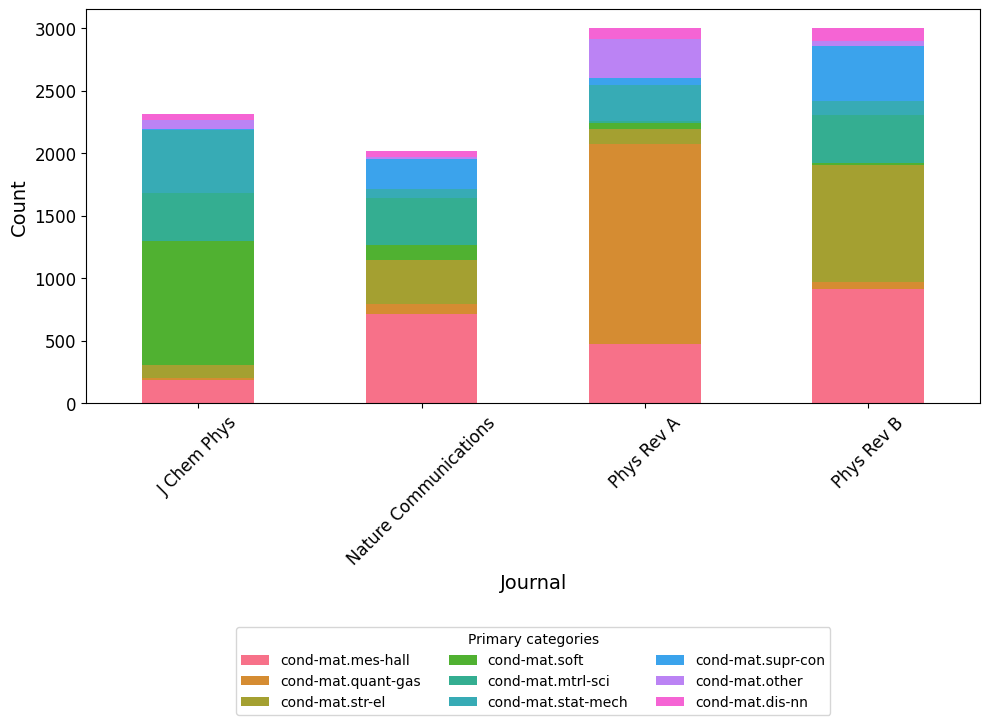

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


clean_data = [item for item in cond_filtered9 if isinstance(item, dict)]
df = pd.DataFrame(clean_data)

df = df.dropna(subset=['journal-ref', 'category_one'])

# Create a new column for counting occurrences
df['count'] = 1
pivot_df = df.pivot_table(index='journal-ref', columns='category_one', values='count', aggfunc='sum', fill_value=0)

category_sums = pivot_df.sum(axis=0).sort_values(ascending=False)
pivot_df_sorted = pivot_df[category_sums.index]

palette = sns.color_palette("husl", 9) 
colors = palette.as_hex()

# Plot with custom color scheme
ax = pivot_df_sorted.plot(kind='bar', stacked=True, figsize=(10, 9), color=colors)

# Title and labels with increased font size
#plt.title('Counts of Primary Categories in Each Unique Journal', fontsize=16)
plt.xlabel('Journal', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Legend
plt.legend(title='Primary categories', bbox_to_anchor=(0.5, -0.55), loc='upper center', ncol=3)

# Show the plot
plt.tight_layout()
plt.show()


### Creating 4 plots, one for each journal:

In [3]:
filtered_conf_filt9 = [entry for entry in cond_filtered9 if isinstance(entry, dict)]  # Filtering step
df = pd.DataFrame(filtered_conf_filt9)  # DataFrame creation

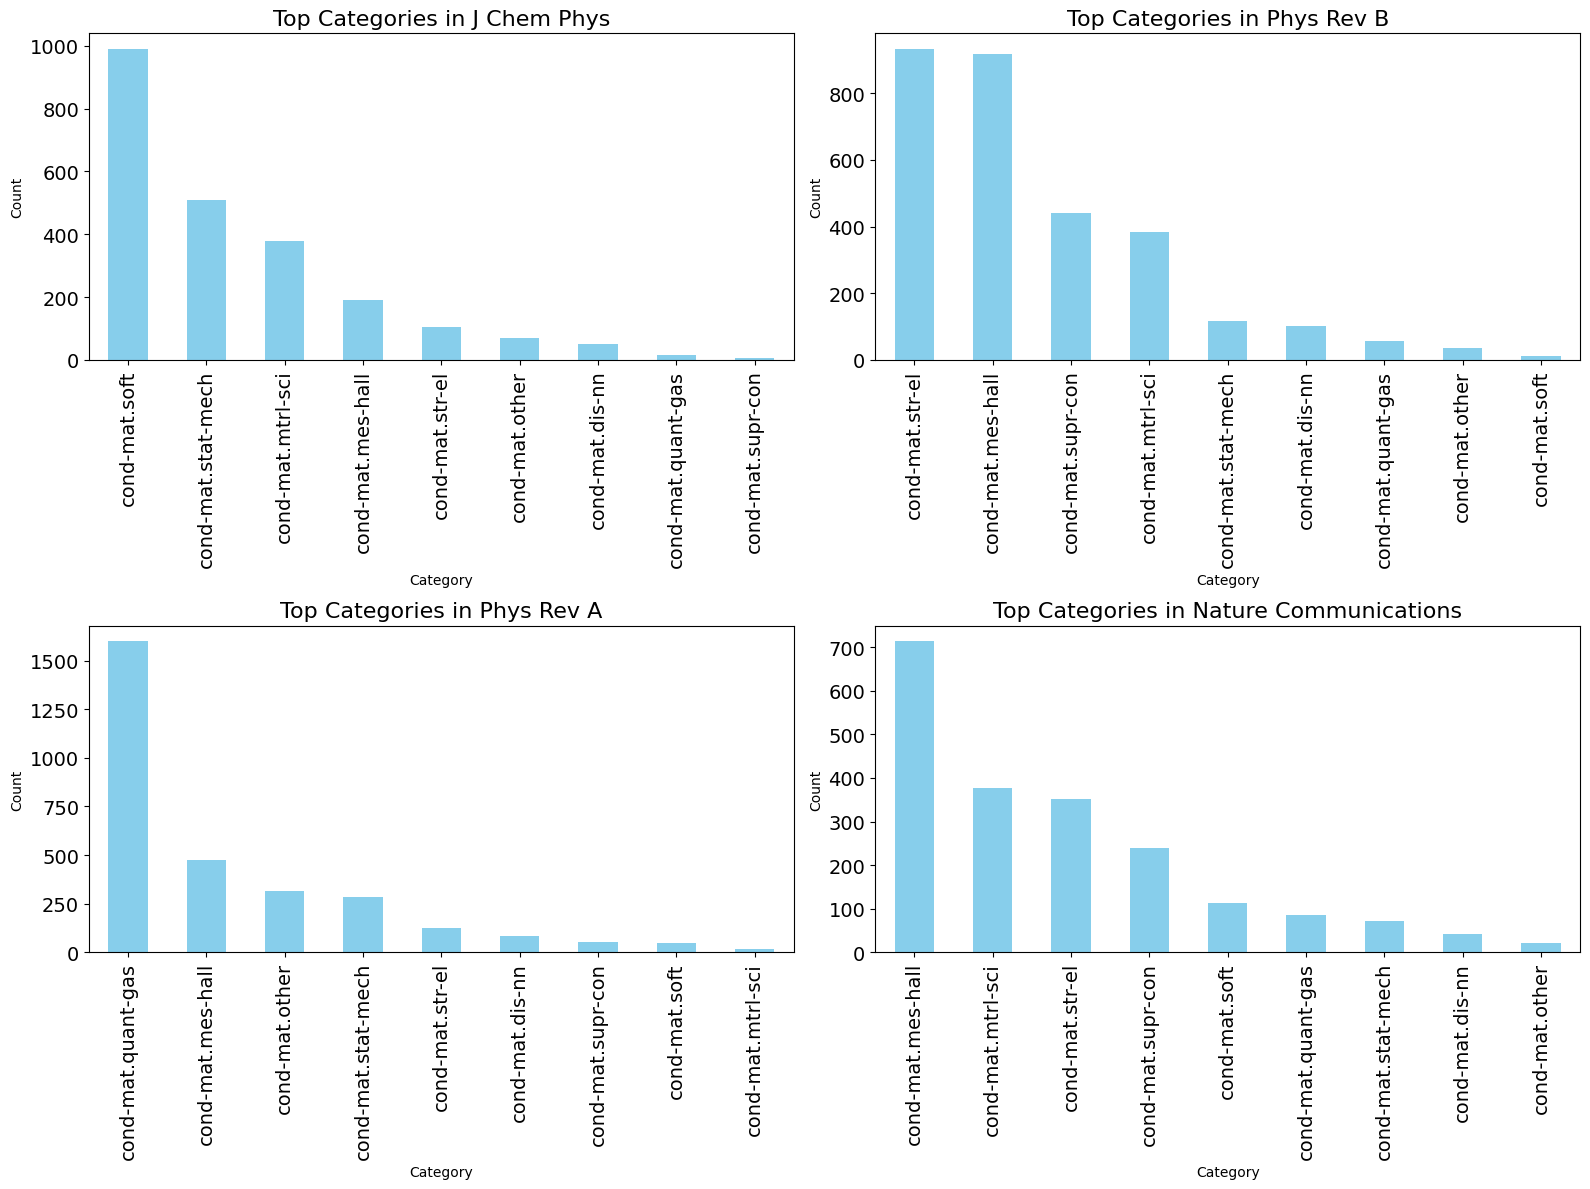

<Figure size 640x480 with 0 Axes>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

journal_names = df['journal-ref'].unique()[:4]  

# Set up the matplotlib figure for 4 subplots (adjust layout as needed)
fig, axes = plt.subplots(2, 2, figsize=(16, 12)) 
axes = axes.flatten()

for i, journal in enumerate(journal_names):
    journal_df = df[df['journal-ref'] == journal]
    category_counts = journal_df['category_one'].value_counts().head(10)
    
    # Plot
    category_counts.plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f"Top Categories in {journal}", fontsize=16)  # Increase font size of title
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel('Category')
    
    # Adjust font size of x-labels and x-ticks
    axes[i].tick_params(axis='x', labelsize=14) 
    axes[i].tick_params(axis='y', labelsize=14) 

# Adjust overall layout
plt.tight_layout()
plt.show()
plt.savefig('sub_plots_categ_journals.png', bbox_inches='tight', dpi=300)